In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
rng = np.random.default_rng(15)

In [3]:
actual_rewards = list(rng.normal(0, 1, 10))
actual_rewards

[-1.4308730228590871,
 -0.9365477163197146,
 0.3939383568003809,
 -0.5240866279019979,
 0.525616204517509,
 0.8073236234093464,
 -1.4435313882996355,
 1.017063788892187,
 -0.5956486475349956,
 2.0940849859026374]

In [4]:
greedy_calculated_rewards = list(np.zeros(10))

In [5]:
greedy_counts = list(np.zeros(10))

In [6]:
greedy_percentage_optimal_actions = []

In [7]:
greedy_average_rewards = [0]

Greedy Algorithm

In [8]:
for i in range(1, 10001):
    best_arm = (max(greedy_calculated_rewards))
    idx = greedy_calculated_rewards.index(best_arm)
    reward = rng.normal(actual_rewards[idx], 1)
    average_reward = ((greedy_average_rewards[len(greedy_average_rewards) - 1] * (i-1)) + reward) / (i + 1)
    greedy_average_rewards.append(average_reward)
    greedy_counts[idx] += 1
    percent = greedy_counts[actual_rewards.index(max(actual_rewards))] / i
    greedy_percentage_optimal_actions.append(percent * 100)
    greedy_calculated_rewards[idx] = ((greedy_calculated_rewards[idx] * (greedy_counts[idx] - 1)) + reward) / greedy_counts[idx]

In [9]:
greedy_calculated_rewards

[-0.7021840813156665,
 -1.4755371469007896,
 0.4012609903374693,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [10]:
greedy_counts

[1.0, 1.0, 9998.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

(-3.0, 3.0)

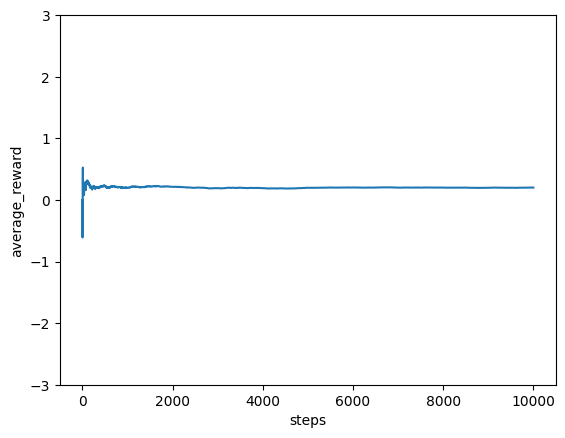

In [11]:
plt.plot(range(10001), greedy_average_rewards)
plt.xlabel("steps")
plt.ylabel("average_reward")
plt.ylim(-3, 3)

Text(0.5, 0, 'steps')

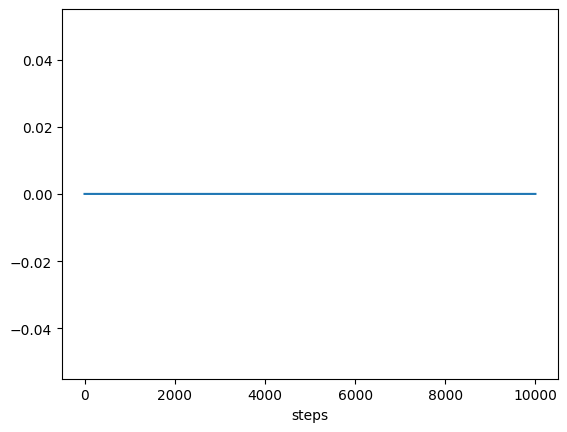

In [12]:
plt.plot(range(10000), greedy_percentage_optimal_actions)
plt.xlabel("steps")

Epsilon Greedy Algorithm

Epsilon = 0.1

In [13]:
import random

In [14]:
e_greedy_calculated_rewards = list(np.zeros(10))
e_greedy_counts = list(np.zeros(10))
e_greedy_percentage_optimal_actions = []
e_greedy_average_rewards = [0]

In [15]:
for i in range(1, 10001):
    selection = random.choices([0, 1], weights=[0.9, 0.1])[0]
    if selection == 0:
        best_arm = (max(e_greedy_calculated_rewards))
        idx = e_greedy_calculated_rewards.index(best_arm)
    else:
        idx = np.random.randint(0, 10)
    reward = rng.normal(actual_rewards[idx], 1)
    average_reward = ((e_greedy_average_rewards[len(e_greedy_average_rewards) - 1] * (i-1)) + reward) / (i + 1)
    e_greedy_average_rewards.append(average_reward)
    e_greedy_counts[idx] += 1
    percent = e_greedy_counts[actual_rewards.index(max(actual_rewards))] / i
    e_greedy_percentage_optimal_actions.append(percent * 100)
    e_greedy_calculated_rewards[idx] = ((e_greedy_calculated_rewards[idx] * (e_greedy_counts[idx] - 1)) + reward) / e_greedy_counts[idx]

In [16]:
e_greedy_counts

[83.0, 109.0, 97.0, 112.0, 154.0, 100.0, 99.0, 107.0, 117.0, 9022.0]

(-3.0, 3.0)

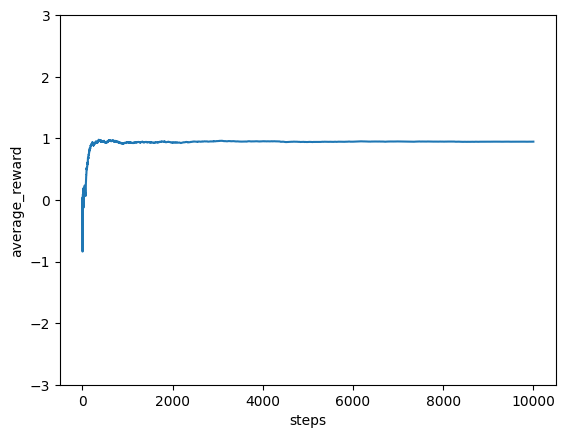

In [17]:
plt.plot(range(10001), e_greedy_average_rewards)
plt.xlabel("steps")
plt.ylabel("average_reward")
plt.ylim(-3, 3)

Text(0.5, 0, 'steps')

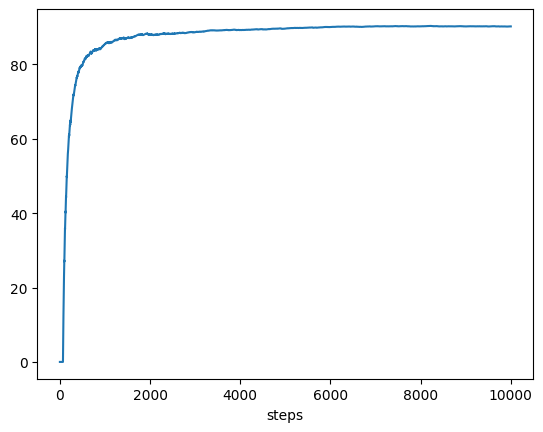

In [18]:
plt.plot(range(10000), e_greedy_percentage_optimal_actions)
plt.xlabel("steps")

Epsilon = 0.01

In [19]:
new_e_greedy_calculated_rewards = list(np.zeros(10))
new_e_greedy_counts = list(np.zeros(10))
new_e_greedy_percentage_optimal_actions = []
new_e_greedy_average_rewards = [0]

In [20]:
for i in range(1, 10001):
    selection = random.choices([0, 1], weights=[0.99, 0.01])[0]
    if selection == 0:
        best_arm = (max(new_e_greedy_calculated_rewards))
        idx = new_e_greedy_calculated_rewards.index(best_arm)
    else:
        idx = np.random.randint(0, 10)
    reward = rng.normal(actual_rewards[idx], 1)
    average_reward = ((new_e_greedy_average_rewards[len(new_e_greedy_average_rewards) - 1] * (i-1)) + reward) / (i + 1)
    new_e_greedy_average_rewards.append(average_reward)
    new_e_greedy_counts[idx] += 1
    percent = new_e_greedy_counts[actual_rewards.index(max(actual_rewards))] / i
    new_e_greedy_percentage_optimal_actions.append(percent * 100)
    new_e_greedy_calculated_rewards[idx] = ((new_e_greedy_calculated_rewards[idx] * (new_e_greedy_counts[idx] - 1)) + reward) / new_e_greedy_counts[idx]

In [21]:
new_e_greedy_counts

[9.0, 10.0, 10.0, 13.0, 6.0, 531.0, 10.0, 7.0, 16.0, 9388.0]

(-3.0, 3.0)

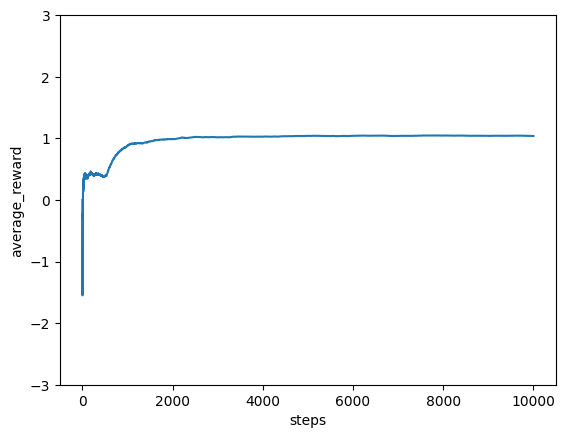

In [22]:
plt.plot(range(10001), new_e_greedy_average_rewards)
plt.xlabel("steps")
plt.ylabel("average_reward")
plt.ylim(-3, 3)

Text(0.5, 0, 'steps')

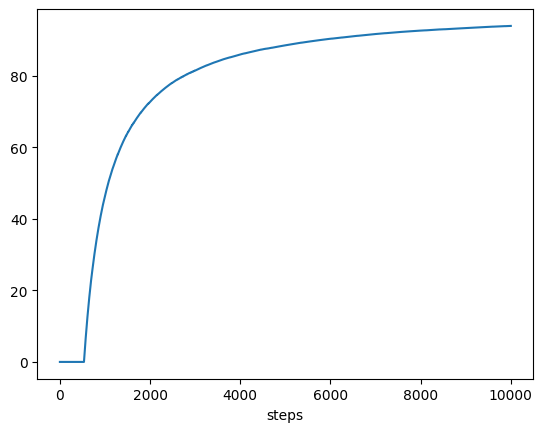

In [23]:
plt.plot(range(10000), new_e_greedy_percentage_optimal_actions)
plt.xlabel("steps")

COMPARING ALL THREE

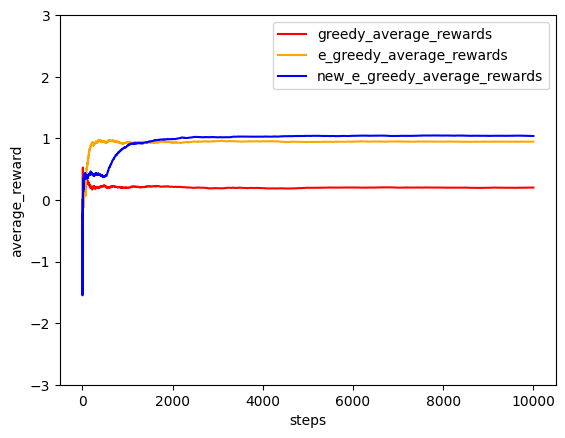

In [24]:
plt.plot(greedy_average_rewards, c='red', label=("greedy_average_rewards"))
plt.plot(e_greedy_average_rewards, c='orange', label=("e_greedy_average_rewards"))
plt.plot(new_e_greedy_average_rewards, c='blue', label=("new_e_greedy_average_rewards"))
plt.xlabel("steps")
plt.ylabel("average_reward")
plt.ylim(-3, 3)
plt.legend();

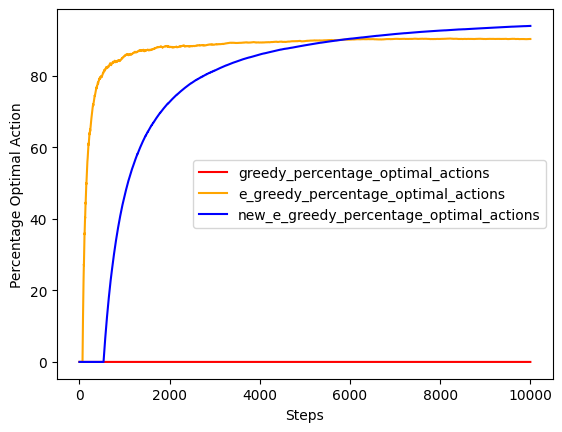

In [25]:
plt.plot(greedy_percentage_optimal_actions, c='red', label=("greedy_percentage_optimal_actions"))
plt.plot(e_greedy_percentage_optimal_actions, c='orange', label=("e_greedy_percentage_optimal_actions"))
plt.plot(new_e_greedy_percentage_optimal_actions, c='blue', label=("new_e_greedy_percentage_optimal_actions"))
plt.ylabel("Percentage Optimal Action")
plt.xlabel("Steps")
plt.legend();

Optimistic Initial Value

In [26]:
optimistic_greedy_calculated_rewards = [5]*10
optimistic_greedy_counts = list(np.zeros(10))
optimistic_greedy_percentage_optimal_actions = []
optimistic_greedy_average_rewards = [0]

In [27]:
for i in range(1, 10001):
    best_arm = (max(optimistic_greedy_calculated_rewards))
    idx = optimistic_greedy_calculated_rewards.index(best_arm)
    reward = rng.normal(actual_rewards[idx], 1)
    average_reward = ((optimistic_greedy_average_rewards[len(optimistic_greedy_average_rewards) - 1] * (i-1)) + reward) / (i + 1)
    optimistic_greedy_average_rewards.append(average_reward)
    optimistic_greedy_counts[idx] += 1
    percent = optimistic_greedy_counts[actual_rewards.index(max(actual_rewards))] / i
    optimistic_greedy_percentage_optimal_actions.append(percent * 100)
    optimistic_greedy_calculated_rewards[idx] = ((optimistic_greedy_calculated_rewards[idx] * (optimistic_greedy_counts[idx] - 1)) + reward) / optimistic_greedy_counts[idx]

In [28]:
optimistic_greedy_calculated_rewards

[-1.22263163362482,
 -0.1267346951273095,
 -0.6436045496505449,
 0.8097914282032773,
 0.361436371054088,
 -0.3421038850098246,
 -2.350801411500573,
 0.15612664330342363,
 -0.5957208263021518,
 2.096763439113317]

In [29]:
actual_rewards

[-1.4308730228590871,
 -0.9365477163197146,
 0.3939383568003809,
 -0.5240866279019979,
 0.525616204517509,
 0.8073236234093464,
 -1.4435313882996355,
 1.017063788892187,
 -0.5956486475349956,
 2.0940849859026374]

In [30]:
optimistic_greedy_counts

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 9991.0]

(-3.0, 3.0)

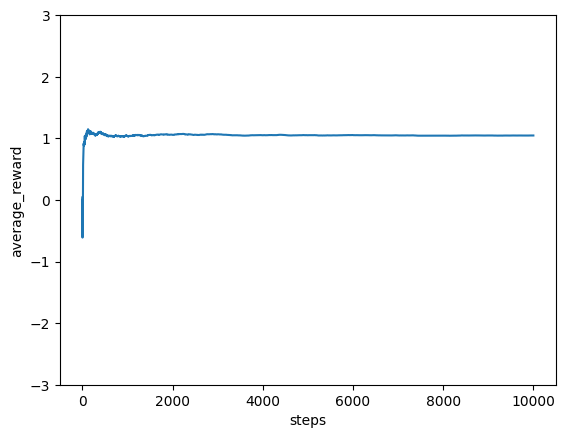

In [31]:
plt.plot(optimistic_greedy_average_rewards)
plt.xlabel("steps")
plt.ylabel("average_reward")
plt.ylim(-3, 3)

Text(0, 0.5, 'percentage_optimal_actions')

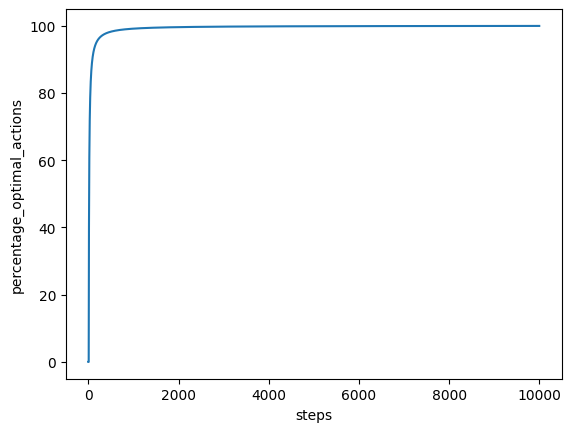

In [32]:
plt.plot(optimistic_greedy_percentage_optimal_actions)
plt.xlabel("steps")
plt.ylabel("percentage_optimal_actions")

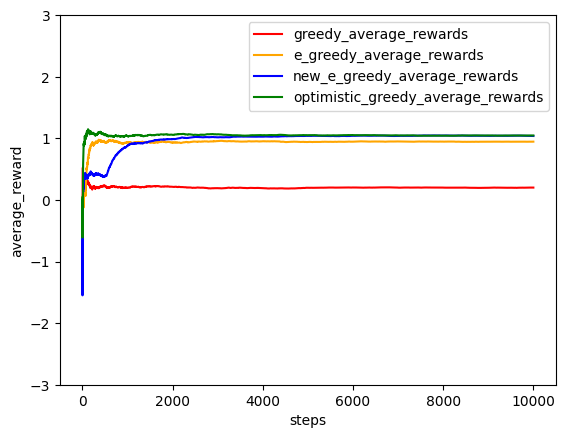

In [33]:
plt.plot(greedy_average_rewards, c='red', label=("greedy_average_rewards"))
plt.plot(e_greedy_average_rewards, c='orange', label=("e_greedy_average_rewards"))
plt.plot(new_e_greedy_average_rewards, c='blue', label=("new_e_greedy_average_rewards"))
plt.plot(optimistic_greedy_average_rewards, c='green', label=("optimistic_greedy_average_rewards"))
plt.xlabel("steps")
plt.ylabel("average_reward")
plt.ylim(-3, 3)
plt.legend();

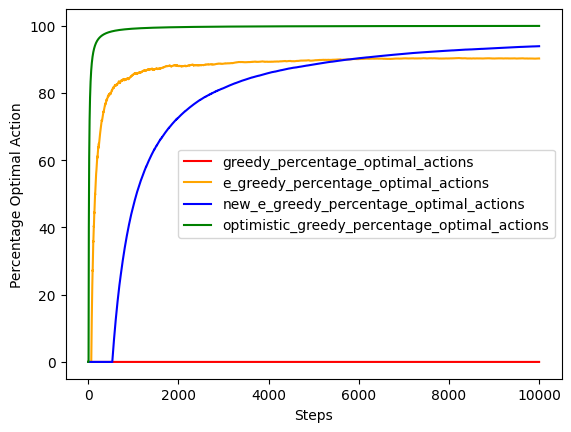

In [34]:
plt.plot(greedy_percentage_optimal_actions, c='red', label=("greedy_percentage_optimal_actions"))
plt.plot(e_greedy_percentage_optimal_actions, c='orange', label=("e_greedy_percentage_optimal_actions"))
plt.plot(new_e_greedy_percentage_optimal_actions, c='blue', label=("new_e_greedy_percentage_optimal_actions"))
plt.plot(optimistic_greedy_percentage_optimal_actions, c='green', label=("optimistic_greedy_percentage_optimal_actions"))
plt.ylabel("Percentage Optimal Action")
plt.xlabel("Steps")
plt.legend();